### Loading the dataset

In [1]:
import tensorflow as tf
(training_image_data, training_label_data), (testing_image_data, testing_label_data) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Visualizing the CIFAR10 dataset

Number of Images in dataset

In [2]:
print("Number of images in training set are",training_image_data.shape[0],"with size",training_image_data[0].shape)
print("Number of images in testing set are",testing_image_data.shape[0],"with size",training_image_data[0].shape)
input_shape = training_image_data[0].shape

Number of images in training set are 50000 with size (32, 32, 3)
Number of images in testing set are 10000 with size (32, 32, 3)


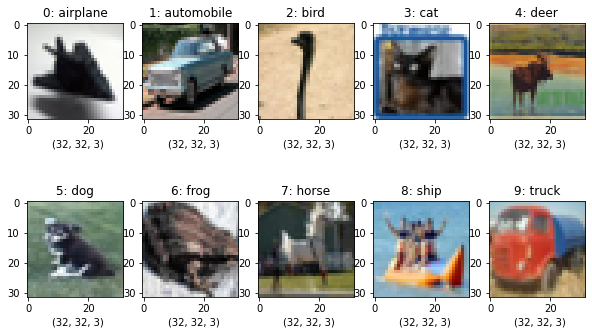

In [3]:
import matplotlib.pyplot as plt
from pylab import *
count=0
num_classes=10
classes=['airplane','automobile','bird', 'cat', 'deer','dog', 'frog', 'horse','ship','truck'] 
figure = plt.figure(figsize =(10,6))
columns = 5
rows = 2
for i in range(len(training_label_data)):
  if int(training_label_data[i])==count:
    subplot(2,5,count+1)
    plt.title(str(count)+': '+classes[count])
    plt.imshow(training_image_data[i])
    plt.text(training_image_data[i].shape[0]/4,training_image_data[i].shape[1]+9,training_image_data[i].shape)
    count = count+1

### Data Transformation

In [4]:
from keras.utils import to_categorical
# one hot encode target values
trainY = to_categorical(training_label_data)
testY = to_categorical(testing_label_data)

Using TensorFlow backend.


In [5]:
import pandas as pd
data = {training_label_data[i].tolist()[0]: trainY[i].tolist() for i in range(len(trainY))} 
pd.DataFrame(data=data.items(),columns=["label","one hot encoded"])

,label,one hot encoded
0,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
6,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
7,3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
9,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
# convert from integers to floats
normalized_training_image_data = training_image_data.astype('float32')
normalized_testing_image_data = testing_image_data.astype('float32')
# normalize to range 0-1
normalized_training_image_data = normalized_training_image_data / 255.0
normalized_testing_image_data = normalized_testing_image_data / 255.0

### Model Construction

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
# from keras.utils import np_utils

model = Sequential()
model.add(Convolution2D(4, 3, 3, border_mode='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Convolution2D(6, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
# model.add(Convolution2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))

# model.add(Convolution2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


### Model Compiling

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Model Fitting

In [9]:
# Train the model
start = time.time()
model_info = model.fit(normalized_training_image_data, trainY, 
                       batch_size=128, nb_epoch=200, 
                       validation_data = (normalized_testing_image_data, testY))
end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 228us/step - loss: 1.9719 - accuracy: 0.2835 - val_loss: 2.0981 - val_accuracy: 0.2223
Epoch 2/200
50000/50000 [==============================] - 4s 80us/step - loss: 1.6693 - accuracy: 0.3884 - val_loss: 1.5553 - val_accuracy: 0.4242
Epoch 3/200
50000/50000 [==============================] - 4s 81us/step - loss: 1.5769 - accuracy: 0.4246 - val_loss: 1.4862 - val_accuracy: 0.4615
Epoch 4/200
50000/50000 [==============================] - 4s 76us/step - loss: 1.4977 - accuracy: 0.4578 - val_loss: 1.3198 - val_accuracy: 0.5291
Epoch 5/200
50000/50000 [==============================] - 4s 79us/step - loss: 1.4283 - accuracy: 0.4857 - val_loss: 1.2899 - val_accuracy: 0.5369
Epoch 6/200
50000/50000 [==============================] - 4s 82us/step - loss: 1.3713 - accuracy: 0.5088 - val_loss: 1.1969 - val_accuracy: 0.5724
Epoch 7/200
50000/50000 [==============================] - 4

### Plotting Results

In [10]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [11]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


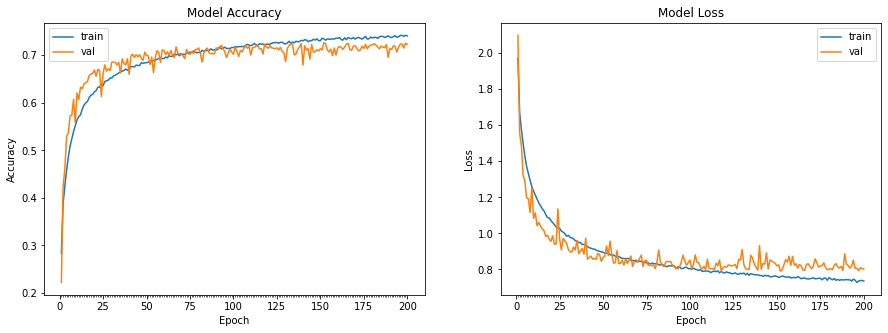

Model took 789.33 seconds to train
Accuracy on test data is: 72.27


In [12]:
plot_model_history(model_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(normalized_testing_image_data, testY, model))
